https://programmers.co.kr/learn/courses/30/lessons/12978

## 문제 설명
N개의 마을로 이루어진 나라가 있습니다. 이 나라의 각 마을에는 1부터 N까지의 번호가 각각 하나씩 부여되어 있습니다. 각 마을은 양방향으로 통행할 수 있는 도로로 연결되어 있는데, 서로 다른 마을 간에 이동할 때는 이 도로를 지나야 합니다. 도로를 지날 때 걸리는 시간은 도로별로 다릅니다. 현재 1번 마을에 있는 음식점에서 각 마을로 음식 배달을 하려고 합니다. 각 마을로부터 음식 주문을 받으려고 하는데, N개의 마을 중에서 K 시간 이하로 배달이 가능한 마을에서만 주문을 받으려고 합니다. 다음은 N = 5, K = 3인 경우의 예시입니다.
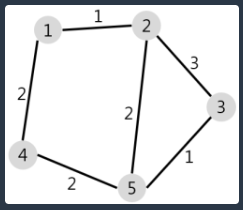
위 그림에서 1번 마을에 있는 음식점은 [1, 2, 4, 5] 번 마을까지는 3 이하의 시간에 배달할 수 있습니다. 그러나 3번 마을까지는 3시간 이내로 배달할 수 있는 경로가 없으므로 3번 마을에서는 주문을 받지 않습니다. 따라서 1번 마을에 있는 음식점이 배달 주문을 받을 수 있는 마을은 4개가 됩니다.
마을의 개수 N, 각 마을을 연결하는 도로의 정보 road, 음식 배달이 가능한 시간 K가 매개변수로 주어질 때, 음식 주문을 받을 수 있는 마을의 개수를 return 하도록 solution 함수를 완성해주세요.

## 제한사항
- 마을의 개수 N은 1 이상 50 이하의 자연수입니다.
- road의 길이(도로 정보의 개수)는 1 이상 2,000 이하입니다.
- road의 각 원소는 마을을 연결하고 있는 각 도로의 정보를 나타냅니다.
- road는 길이가 3인 배열이며, 순서대로 (a, b, c)를 나타냅니다.
    - a, b(1 ≤ a, b ≤ N, a != b)는 도로가 연결하는 두 마을의 번호이며, c(1 ≤ c ≤ 10,000, c는 자연수)는 도로를 지나는데 걸리는 시간입니다.
    - 두 마을 a, b를 연결하는 도로는 여러 개가 있을 수 있습니다.
    - 한 도로의 정보가 여러 번 중복해서 주어지지 않습니다.
- K는 음식 배달이 가능한 시간을 나타내며, 1 이상 500,000 이하입니다.
- 임의의 두 마을간에 항상 이동 가능한 경로가 존재합니다.
- 1번 마을에 있는 음식점이 K 이하의 시간에 배달이 가능한 마을의 개수를 return 하면 됩니다.


In [1]:
# 문제의 예시
N = 5
road = [[1,2,1],[2,3,3],[5,2,2],[1,4,2],[5,3,1],[5,4,2]]
K = 3
# 4 

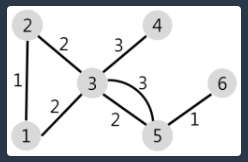

In [2]:
N = 6
road = [[1,2,1],[1,3,2],[2,3,2],[3,4,3],[3,5,2],[3,5,3],[5,6,1]]
K = 4
# 4

In [3]:
dist = [float('inf')] * (N+1)
dist[1] = 0 # 1은 자기자신 이니까 거리 0
adj = [[] for _ in range(N+1)] # 인접노드, 거리 저장

In [4]:
for r in road:
    adj[r[0]].append([r[2],r[1]]) # [거리, 노드]
    adj[r[1]].append([r[2], r[0]])

In [5]:
adj

[[],
 [[1, 2], [2, 3]],
 [[1, 1], [2, 3]],
 [[2, 1], [2, 2], [3, 4], [2, 5], [3, 5]],
 [[3, 3]],
 [[2, 3], [3, 3], [1, 6]],
 [[1, 5]]]

In [6]:
import heapq
def dijkstra(dist, adj):
    heap = []
    heapq.heappush(heap, [0,1]) #거리, 노드
    
    while heap:
        cost, node = heapq.heappop(heap)
        for c, n in adj[node]:
            if cost+c < dist[n]:
                dist[n] = cost + c # 더 짧으면 갱신
                heapq.heappush(heap, [cost+c, n]) # 노드 추가

In [7]:
dijkstra(dist, adj)

In [8]:
dist

[inf, 0, 1, 2, 5, 4, 5]

In [9]:
len([i for i in dist if i<=K])

4

solution

In [ ]:
import heapq
def dijkstra(dist, adj):
    heap = []
    heapq.heappush(heap, [0,1]) #거리, 노드
    
    while heap:
        cost, node = heapq.heappop(heap)
        for c, n in adj[node]:
            if cost+c < dist[n]:
                dist[n] = cost + c # 더 짧으면 갱신
                heapq.heappush(heap, [cost+c, n]) # 노드 추가
                
                
def solution(N, road, K):
    dist = [float('inf')] * (N+1) # 1에서 최단거리 저장
    dist[1] = 0 # 1은 자기자신 이니까 거리 0
    adj = [[] for _ in range(N+1)] # 인접노드, 거리 저장
    for r in road:
        adj[r[0]].append([r[2],r[1]]) # [거리, 노드]
        adj[r[1]].append([r[2], r[0]])
    dijkstra(dist, adj)
    
    return len([i for i in dist if i<=K])